# ▒ 앙상블 ▒

## 0. 환경설정

In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.ensemble import GradientBoostingRegressor
#from sklearn.ensemble import GradientBoostingClassifier

import matplotlib.pyplot as plt

## 1. 데이터 불러오기

### Boston Housing Dataset

- 보스턴 주택 가격 데이터
- 1978년에 발표된 데이터로 미국 보스턴 지역의 주택 가격에 영향을 미치는 요소들을 정리
- 총 13가지의 요소들과 주택 가격으로 이루어져 있음.

### 데이터 호출

In [2]:
boston = load_boston()

X_boston = pd.DataFrame(boston.data, columns=boston.feature_names)
y_boston = pd.DataFrame(boston.target, columns=['MEDV']).iloc[:,0]

### 데이터 분할
- Training set 70%, Test set 30% 무작위 추출을 이용하여 나누기


In [3]:
X_train, X_test, y_train, y_test = \
train_test_split(X_boston, y_boston, 
                 test_size = 0.3, random_state=123)

## 2. 앙상블 - Boosting

### 모형적합

In [12]:
gbm_model = GradientBoostingRegressor(n_estimators = 1000,
                                      max_depth = 3)
                                  
gbm_model.fit(X_train, y_train)

GradientBoostingRegressor(n_estimators=1000)

### 예측

In [13]:
gbm_pred = gbm_model.predict(X_test)
print((y_test-gbm_pred).pow(2).mean())

13.37238327786511


### Partial Dependence Plot

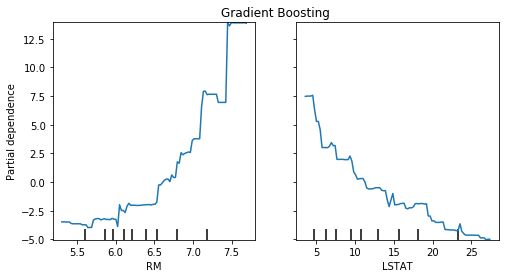

In [15]:
from sklearn.inspection import plot_partial_dependence
fig, ax = plt.subplots(figsize=(8, 4))
ax.set_title("Gradient Boosting", fontsize=12)
tree_disp = plot_partial_dependence(gbm_model, X_train, ["RM","LSTAT"], ax=ax)

### Variable Importance Plot

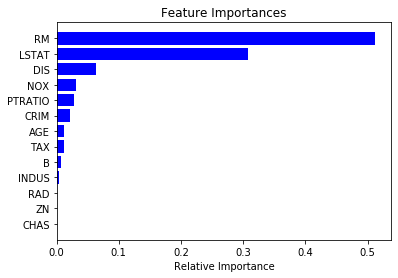

In [16]:
importances = gbm_model.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [boston.feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()